In [40]:
import pandas as pd

In [41]:
# 데이터 불러오기
data = pd.read_csv('./pokemon.csv')

In [42]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [43]:
# 데이터 통계 확인
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [44]:
# 데이터 샘플
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [45]:
# 결측치 확인
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 #               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [46]:
# 필요없는 데이터 제거
data = data.drop(['#'], axis = 1)

In [47]:
# 제거 후 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [48]:
# 필요없는 데이터 제거
data = data.dropna(subset=['Name'])

In [49]:
# 제거 후 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      799 non-null    object
 2   Type 2      414 non-null    object
 3   HP          799 non-null    int64 
 4   Attack      799 non-null    int64 
 5   Defense     799 non-null    int64 
 6   Sp. Atk     799 non-null    int64 
 7   Sp. Def     799 non-null    int64 
 8   Speed       799 non-null    int64 
 9   Generation  799 non-null    int64 
 10  Legendary   799 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.4+ KB


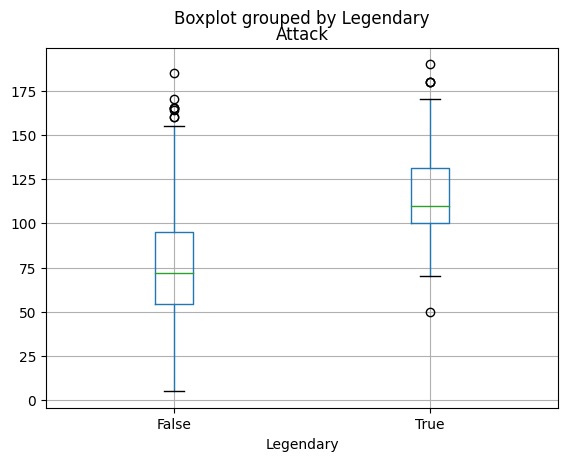

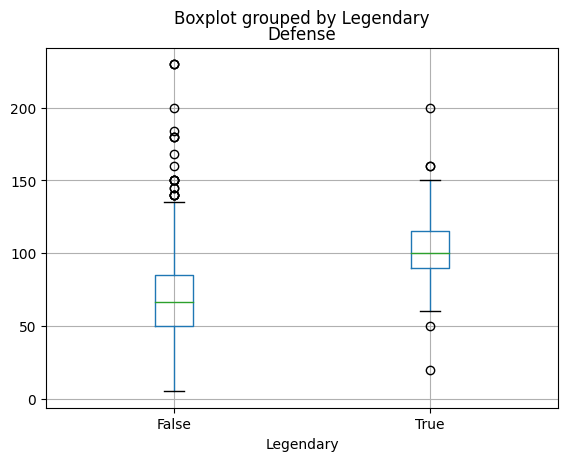

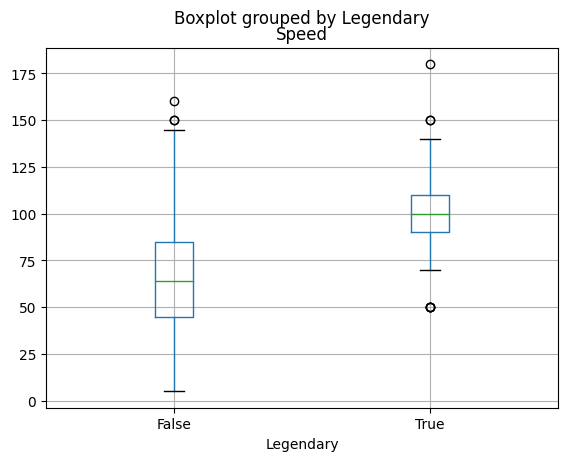

In [50]:
# 전설에 따른 Attack, Defense, Speed 비교
col = ['Attack', 'Defense', 'Speed']
for c in col:
  data.boxplot(column=c ,by = 'Legendary')

In [51]:
import numpy as np

# 결측값 변환 함수
def add_missing_values(df, col_name, missing_frac):
    np.random.seed(42)  # 재현성을 위해 랜덤 시드 설정
    n_rows = df.shape[0] # 데이터프레임의 행 수
    n_missing = int(n_rows * missing_frac) # 결측값을 추가할 행의 수를 계산

    missing_indices = np.random.choice(n_rows, n_missing, replace=False) # 결측값을 추가할 행의 인덱스를 무작위로 선택
    df.loc[missing_indices, col_name] = np.nan # 선택된 인덱스의 열 값을 NaN으로 설정

In [52]:
# 결측값 추가
add_missing_values(data, 'Attack', 0.1)  # Attack 열에 10% 결측값 추가
add_missing_values(data, 'Legendary', 0.1)  # Legendary 열에 10% 결측값 추가

In [53]:
# 결측값 추가 후 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        799 non-null    object 
 1   Type 1      799 non-null    object 
 2   Type 2      414 non-null    object 
 3   HP          799 non-null    int64  
 4   Attack      720 non-null    float64
 5   Defense     799 non-null    int64  
 6   Sp. Atk     799 non-null    int64  
 7   Sp. Def     799 non-null    int64  
 8   Speed       799 non-null    int64  
 9   Generation  799 non-null    int64  
 10  Legendary   720 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 107.2+ KB


In [54]:
# 결측값을 Type 별 평균값으로 대체
data['Attack'] = data.groupby('Type 1')['Attack'].transform(lambda x: x.fillna(x.mean()))

In [55]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        799 non-null    object 
 1   Type 1      799 non-null    object 
 2   Type 2      414 non-null    object 
 3   HP          799 non-null    int64  
 4   Attack      799 non-null    float64
 5   Defense     799 non-null    int64  
 6   Sp. Atk     799 non-null    int64  
 7   Sp. Def     799 non-null    int64  
 8   Speed       799 non-null    int64  
 9   Generation  799 non-null    int64  
 10  Legendary   720 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 107.2+ KB


In [56]:
# 전설의 경우 False로 결측값 대체
data['Legendary'].fillna(False, inplace = True)

In [57]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        799 non-null    object 
 1   Type 1      799 non-null    object 
 2   Type 2      414 non-null    object 
 3   HP          799 non-null    int64  
 4   Attack      799 non-null    float64
 5   Defense     799 non-null    int64  
 6   Sp. Atk     799 non-null    int64  
 7   Sp. Def     799 non-null    int64  
 8   Speed       799 non-null    int64  
 9   Generation  799 non-null    int64  
 10  Legendary   799 non-null    bool   
dtypes: bool(1), float64(1), int64(6), object(3)
memory usage: 101.7+ KB


In [58]:
# 전설의 경우 Y, 아닐 경우 N 값으로 대체
data['Legendary'] = ['Y' if l == True else 'N' for l in data['Legendary']]
data['Legendary'].head()

0    N
1    N
2    N
3    N
4    N
Name: Legendary, dtype: object

In [59]:
# 범주형 데이터 인코딩 (레이블 인코딩)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # 객체 생성
data['Legendary'] = le.fit_transform(data['Legendary']) # 레이블 인코딩 (Alphabetic)

In [60]:
# 인코딩 후 확인
data['Legendary'].head()

0    0
1    0
2    0
3    0
4    0
Name: Legendary, dtype: int64

In [61]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler # standardize
print("Data before scaling:\n", data[['Attack', 'Defense', 'Speed']].head())

scaler = StandardScaler() # 객체 생성
data[['Attack', 'Defense', 'Speed']] = scaler.fit_transform(data[['Attack', 'Defense', 'Speed']]) # 스케일링

print("Data after scaling:\n", data[['Attack', 'Defense', 'Speed']].head())

Data before scaling:
    Attack  Defense  Speed
0    49.0       49     45
1    62.0       63     60
2    82.0       83     80
3   100.0      123     80
4    52.0       43     65
Data after scaling:
      Attack   Defense     Speed
0 -0.978362 -0.797309 -0.800275
1 -0.559655 -0.348298 -0.283837
2  0.084510  0.293146  0.404748
3  0.664258  1.576034  0.404748
4 -0.881738 -0.989742 -0.111690


In [65]:
# 타입 별 데이터 확인
data.groupby('Type 1').size()

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     26
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64